# Exploratory Data Analysis (EDA) and Business Insights

In [ ]:
#Import lib

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
customer_df = pd.read_csv('Customers.csv')
print(customer_df)

    CustomerID        CustomerName         Region  SignupDate
0        C0001    Lawrence Carroll  South America  2022-07-10
1        C0002      Elizabeth Lutz           Asia  2022-02-13
2        C0003      Michael Rivera  South America  2024-03-07
3        C0004  Kathleen Rodriguez  South America  2022-10-09
4        C0005         Laura Weber           Asia  2022-08-15
..         ...                 ...            ...         ...
195      C0196         Laura Watts         Europe  2022-06-07
196      C0197    Christina Harvey         Europe  2023-03-21
197      C0198         Rebecca Ray         Europe  2022-02-27
198      C0199      Andrea Jenkins         Europe  2022-12-03
199      C0200         Kelly Cross           Asia  2023-06-11

[200 rows x 4 columns]


In [5]:
customer_df.describe()

,CustomerID,CustomerName,Region,SignupDate
count,200,200,200,200
unique,200,200,4,179
top,C0001,Lawrence Carroll,South America,2024-11-11
freq,1,1,59,3


In [6]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


In [7]:
product_df = pd.read_csv('Products.csv')

In [8]:
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB


In [9]:
trans_df = pd.read_csv('Transactions.csv')

In [10]:
trans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB


In [28]:
customer_df['SignupDate']=pd.to_datetime(customer_df['SignupDate'])
trans_df['TransactionDate']=pd.to_datetime(trans_df['TransactionDate'])

In [29]:
customer_df.info()
trans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   CustomerID    200 non-null    object        
 1   CustomerName  200 non-null    object        
 2   Region        200 non-null    object        
 3   SignupDate    200 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 6.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   TransactionID    1000 non-null   object        
 1   CustomerID       1000 non-null   object        
 2   ProductID        1000 non-null   object        
 3   TransactionDate  1000 non-null   datetime64[ns]
 4   Quantity         1000 non-null   int64         
 5   TotalValue       1000 non-null   float64       
 6   Pri

### EDA - Exploratory Data Analysis

1. Most and Least Selling Products

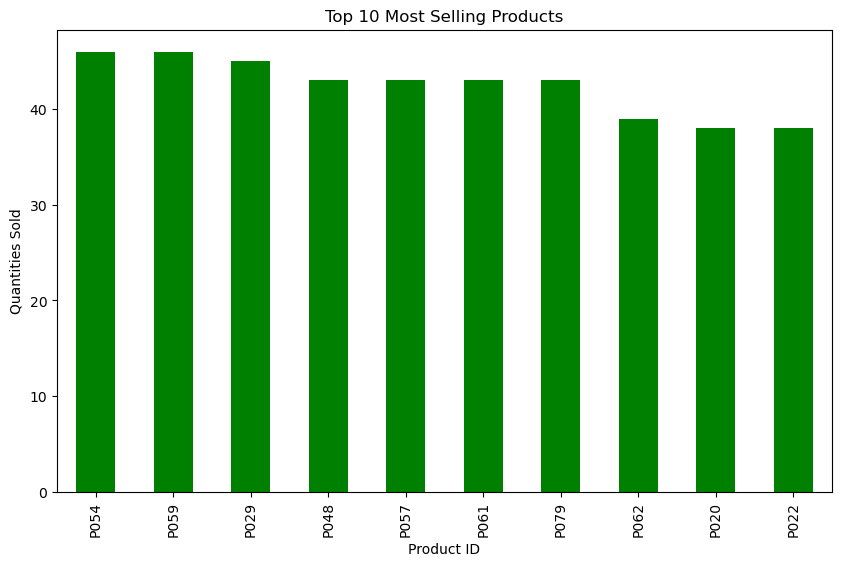

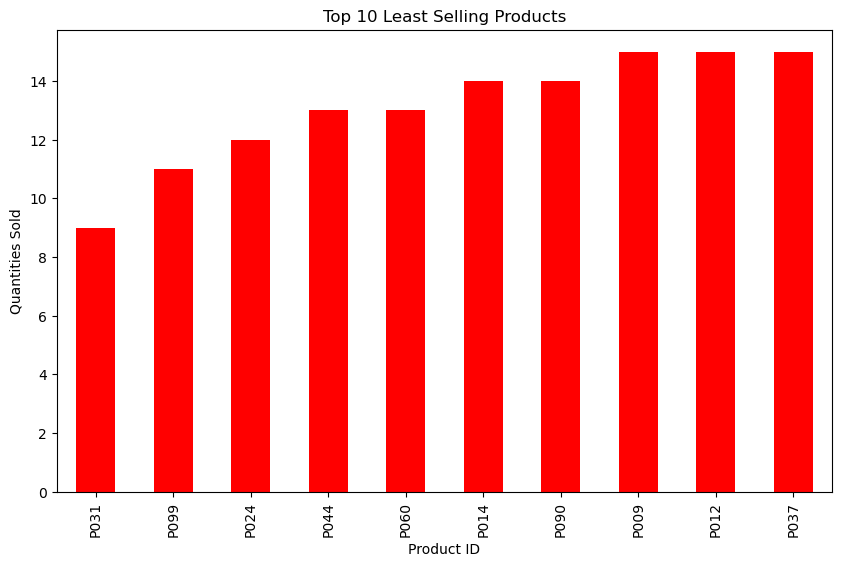

In [47]:
product_sales = trans_df.groupby('ProductID')['Quantity'].sum()
top_selling = product_sales.nlargest(10)
least_selling = product_sales.nsmallest(10)

# Most Selling Products
plt.figure(figsize=(10, 6))
top_selling.plot(kind='bar', color='green')
plt.title('Top 10 Most Selling Products')
plt.ylabel('Quantities Sold')
plt.xlabel('Product ID')
plt.show()

# Least Selling Products
plt.figure(figsize=(10, 6))
least_selling.plot(kind='bar', color='red')
plt.title('Top 10 Least Selling Products')
plt.ylabel('Quantities Sold')
plt.xlabel('Product ID')
plt.show()

2. Monthly Sales Distribution

In [21]:
trans_df['Month'] = trans_df['TransactionDate'].dt.month

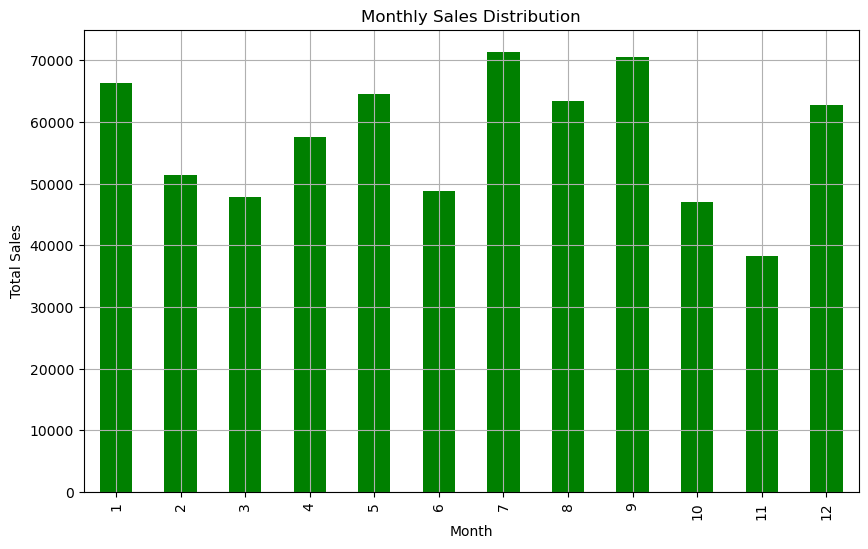

In [24]:
monthly_sales = trans_df.groupby('Month')['TotalValue'].sum()
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='bar', color='green')
plt.title('Monthly Sales Distribution')
plt.ylabel('Total Sales')
plt.xlabel('Month')
plt.grid()
plt.show()

3. Top 5 Customers by Spending

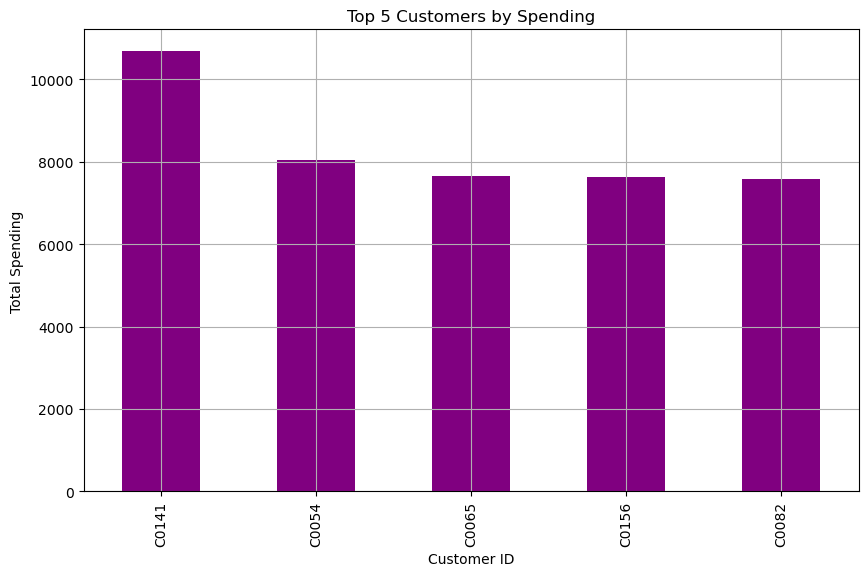

In [27]:
top_customers = trans_df.groupby('CustomerID')['TotalValue'].sum().nlargest(5)
plt.figure(figsize=(10, 6))
top_customers.plot(kind='bar', color='purple')
plt.title('Top 5 Customers by Spending')
plt.ylabel('Total Spending')
plt.xlabel('Customer ID')
plt.grid()
plt.show()

4. Monthly Revenue Growth Rate

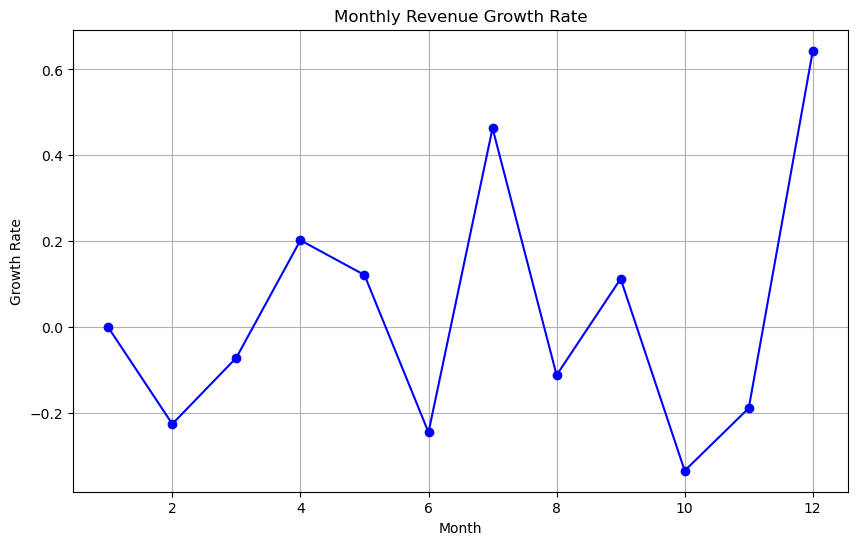

In [31]:
monthly_revenue = trans_df.groupby('Month')['TotalValue'].sum()
growth_rate = monthly_revenue.pct_change().fillna(0)

# Plot
plt.figure(figsize=(10, 6))
growth_rate.plot(kind='line', marker='o', color='blue')
plt.title('Monthly Revenue Growth Rate')
plt.ylabel('Growth Rate')
plt.xlabel('Month')
plt.grid()
plt.show()

5. Customer Region Distribution

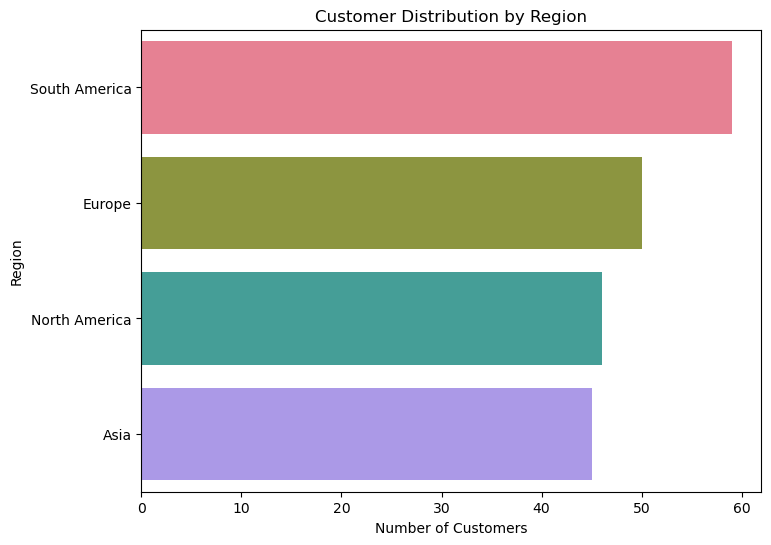

In [41]:
region_distribution = customer_df['Region'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(y=region_distribution.index, x=region_distribution.values, palette='husl')
plt.title('Customer Distribution by Region')
plt.xlabel('Number of Customers')
plt.ylabel('Region')
plt.show()

6. Sales by Product Category

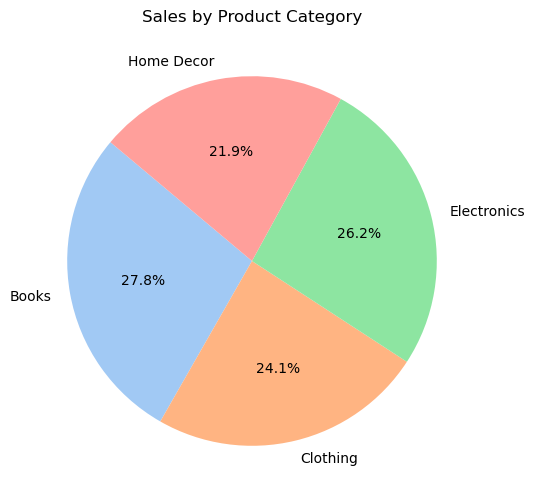

In [44]:
category_sales = trans_df.merge(product_df, on='ProductID').groupby('Category')['TotalValue'].sum()
plt.figure(figsize=(8, 6))
category_sales.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Sales by Product Category')
plt.ylabel('')
plt.show()

7. Product Category Distribution

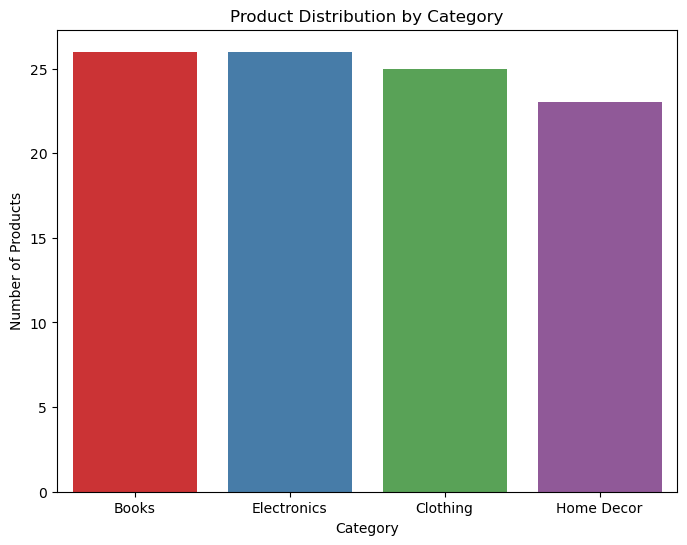

In [46]:
category_distribution = product_df['Category'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=category_distribution.index, y=category_distribution.values, palette='Set1')
plt.title('Product Distribution by Category')
plt.ylabel('Number of Products')
plt.xlabel('Category')
plt.show()
